In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import mnist

In [2]:
(x_train, t_train), (x_test, t_test) = mnist.load_data()

print('\n train shape = ', x_train.shape, ', train label shape = ', t_train.shape)
print(' test shape = ', x_test.shape, ', test label shape =', t_test.shape)

print('\n train label = ', t_train)  # 학습데이터 정답 출력
print(' test label  = ', t_test)     # 테스트 데이터 정답 출력


 train shape =  (60000, 28, 28) , train label shape =  (60000,)
 test shape =  (10000, 28, 28) , test label shape = (10000,)

 train label =  [5 0 4 ... 5 6 8]
 test label  =  [7 2 1 ... 4 5 6]


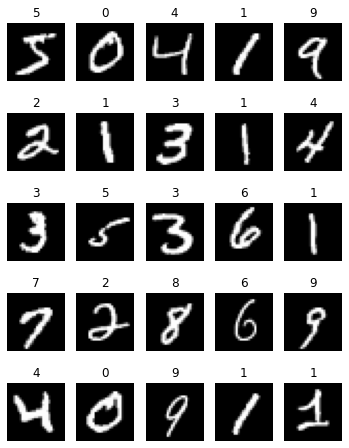

In [3]:
import matplotlib.pyplot as plt

# 100개의 이미지 출력
plt.figure(figsize=(6, 8)) 

for index in range(25):    # 100 개 이미지 출력
    plt.subplot(5, 5, index + 1)  # 10행 10열 
    plt.imshow(x_train[index], cmap='gray') 
    plt.axis('off')   
    plt.title(str(t_train[index]))
plt.show()

In [4]:
print(x_test[1])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 116 125 171 255 255 150  93   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 169 253 253 253 253 253 253 218  30
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 169 253 253 253 213 142 176 253 253 122
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  52 250 253 210  32  12   0   6 206 253 140
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  77 251 210  25   0   0   0 122 248 253  65
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  31  18   0   0   0   0 209 25

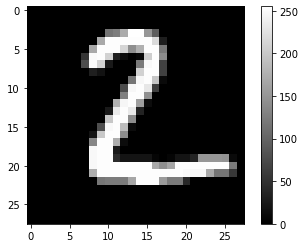

In [5]:
plt.imshow(x_test[1], cmap='gray') 
plt.colorbar()   
plt.show()

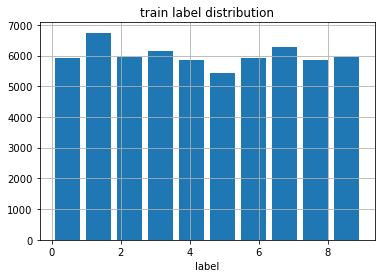

In [6]:
plt.title('train label distribution')
plt.grid()
plt.xlabel('label')
plt.hist(t_train, bins=10, rwidth=0.8)
plt.show()

In [7]:
# 학습데이터 정답 분포 확인
label_distribution = np.zeros(10)

for idx in range(len(t_train)):
    label = int(t_train[idx])
    label_distribution[label] +=1 # label_distribution[label] + 1

print(label_distribution)

[5923. 6742. 5958. 6131. 5842. 5421. 5918. 6265. 5851. 5949.]


In [8]:
# 학습 데이터 / 테스트 데이터 정규화 (Normalization)
x_train = (x_train - 0.0) / (255.0 - 0.0)
x_test = (x_test - 0.0) / (255.0 - 0.0)
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [9]:
# 정답 데이터 원핫 인코딩 (One-Hot Encoding)
#5,0
t_train = tf.keras.utils.to_categorical(t_train, num_classes=10) #5:[0,0,0,0,0,1,0,0,0,0]
t_test = tf.keras.utils.to_categorical(t_test, num_classes=10)

In [10]:
#print(x_train[0])
print(t_train[0])
print(t_test[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [11]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28))) #입력층
model.add(tf.keras.layers.Dense(100, activation='relu')) #은닉층
model.add(tf.keras.layers.Dense(10, activation='softmax')) #출력층

In [12]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss='categorical_crossentropy', #분류할 것이 3개가지 이상이면 categorical_crossentropy을 사용
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [25]:
#오버피팅을 확인하기 위해서 validation데이터를 할당함
hist = model.fit(x_train, t_train, epochs=30, validation_split=0.3) 

Epoch 1/30
1313/1313 [==============================] - 3s 3ms/step - loss: 0.0052 - accuracy: 0.9984 - val_loss: 0.1651 - val_accuracy: 0.9733
Epoch 2/30
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0036 - accuracy: 0.9989 - val_loss: 0.1792 - val_accuracy: 0.9701
Epoch 3/30
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0039 - accuracy: 0.9989 - val_loss: 0.1726 - val_accuracy: 0.9726
Epoch 4/30
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0024 - accuracy: 0.9993 - val_loss: 0.2069 - val_accuracy: 0.9681
Epoch 5/30
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0044 - accuracy: 0.9987 - val_loss: 0.1945 - val_accuracy: 0.9707
Epoch 6/30
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0024 - accuracy: 0.9992 - val_loss: 0.1688 - val_accuracy: 0.9726
Epoch 7/30
1313/1313 [==============================] - 3s 2ms/step - loss: 8.0735e-04 - accuracy: 0.9999 - val_loss: 0.1732 - val_accur

In [14]:
model.evaluate(x_test, t_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1192 - accuracy: 0.9770


[0.11916285753250122, 0.9769999980926514]

In [15]:
predictions=model.predict(x_test)

313/313 [==============================] - 0s 1ms/step


In [16]:
predictions[5]

array([1.08453972e-15, 9.99998093e-01, 6.45455304e-12, 1.23475995e-11,
       6.15920370e-11, 2.28942649e-17, 5.90165166e-15, 1.89455045e-06,
       1.46019752e-09, 5.70664325e-14], dtype=float32)

In [26]:
#argmax를 사용하여 predictions[5]에서의 제일 큰 값을 받음
label=np.argmax(predictions[5])
label

1

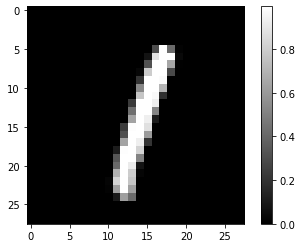

In [18]:
plt.imshow(x_test[5], cmap='gray') 
plt.colorbar()   
plt.show()

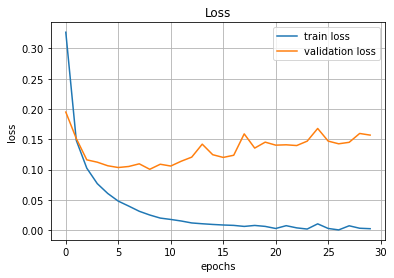

In [19]:
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')

plt.legend(loc='best')
plt.show()

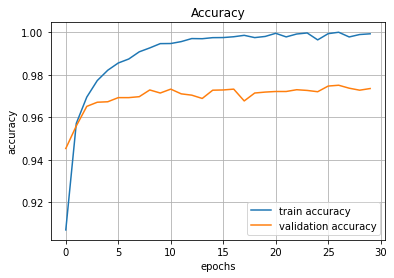

In [20]:
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')

plt.legend(loc='best')
plt.show()

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

313/313 [==============================] - 0s 1ms/step


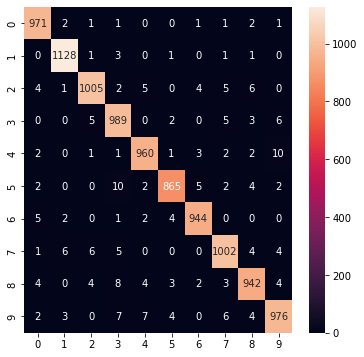

In [30]:
plt.figure(figsize=(6, 6))

predicted_value = model.predict(x_test)

#confusion_matrix를 사용하면 정확하게 몇 개가 분류되었는지 확인할 수 있다.
cm = confusion_matrix(np.argmax(t_test, axis=-1),np.argmax(predicted_value, axis=-1))

sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [27]:
print(cm)
print('\n')

for i in range(10):
    print(('label = %d\t(%d/%d)\taccuracy = %.3f')%(i, np.max(cm[i]), np.sum(cm[i]), np.max(cm[i])/np.sum(cm[i])))

[[ 969    0    1    1    1    1    1    0    3    3]
 [   0 1126    3    1    0    1    0    0    4    0]
 [   3    1 1010    1    4    0    3    2    8    0]
 [   0    0    4  987    0    4    0    4    5    6]
 [   1    1    2    1  946    4    3    1    1   22]
 [   3    0    0    6    2  871    4    1    4    1]
 [   6    2    1    1    4    2  940    0    2    0]
 [   1    4   11    3    1    0    0  995    5    8]
 [   3    0    6    3    4    4    0    4  947    3]
 [   3    3    0    6    8    3    0    4    3  979]]


label = 0	(969/980)	accuracy = 0.989
label = 1	(1126/1135)	accuracy = 0.992
label = 2	(1010/1032)	accuracy = 0.979
label = 3	(987/1010)	accuracy = 0.977
label = 4	(946/982)	accuracy = 0.963
label = 5	(871/892)	accuracy = 0.976
label = 6	(940/958)	accuracy = 0.981
label = 7	(995/1028)	accuracy = 0.968
label = 8	(947/974)	accuracy = 0.972
label = 9	(979/1009)	accuracy = 0.970


In [29]:
# 정답 및 예측 값 분포 확인
label_distribution = np.zeros(10)
prediction_distribution = np.zeros(10)

for idx in range(len(t_test)):

    label = int(np.argmax(t_test[idx]))

    label_distribution[label] = label_distribution[label] + 1

    prediction = int(np.argmax(predicted_value[idx]))

    prediction_distribution[prediction] = prediction_distribution[prediction] + 1


print(label_distribution)
print(prediction_distribution)

[ 980. 1135. 1032. 1010.  982.  892.  958. 1028.  974. 1009.]
[ 989. 1137. 1038. 1010.  970.  890.  951. 1011.  982. 1022.]
